In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
def toy_CNN(X_train, y_train, **kwargs):
        
    model = Sequential([
        Conv2D(filters=8, kernel_size=(8,8), strides=(4,4), activation='relu', input_shape=(384, 512, 3)),
        MaxPooling2D(pool_size=(8,8)),
        Conv2D(filters=8, kernel_size=(8,8), strides=(4,4), activation='relu'),
        Dropout(0.1),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
    history = model.fit(X_train, y_train, **kwargs)
    return model, history

In [3]:
def small_CNN(X_train, y_train, **kwargs):
        
    model = Sequential([
        Conv2D(filters=8, kernel_size=(8,8), strides=(4,4), activation='relu', input_shape=(384, 512, 3)),
        MaxPooling2D(pool_size=(8,8)),
        Conv2D(filters=8, kernel_size=(4,4), strides=(2,2), activation='relu'),
        MaxPooling2D(pool_size=(4,4)),
        Conv2D(filters=4, kernel_size=(4,4), strides=(2,2), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(filters=4, kernel_size=(2,2), strides=(1,1), activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
    history = model.fit(X_train, y_train, **kwargs)
    return model, history

In [4]:
X, y = [], []
folder = 'dataset-resized'
folder_list = os.listdir(folder)
nTotal = len(folder_list)
print('Total datapoints:', nTotal)
nTrash = 0
for file in folder_list:
    trash = int(file.split('_')[0] == 'trash')
    if not trash:
        if np.random.rand() > 1: #0.2:
            continue
    img = Image.open(f'{folder}/{file}')
    arr = np.array(img)
    X.append(arr)
    y.append(trash)
    nTrash += trash
print('Kept datapoints:', len(y))
print('Trash datapoints:', nTrash)
X, y = np.array(X), np.array(y)
print('done')

Total datapoints: 2527
Kept datapoints: 2527
Trash datapoints: 137
done


In [5]:
def train_test_split(X, y, test_idx=None, test_size=0.2):
    ''' Split input data X and labels y into training and testing arrays '''
    n_list = list(range(len(y)))
    if test_idx is None:
        print('\n -- Performing NEW train-test split -- \n')
        test_idx = np.random.choice(n_list, replace=False, size=int(test_size*len(y)))
    else:
        test_idx = np.array(test_idx)
    train_idx = np.array([i for i in n_list if i not in test_idx])
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test, test_idx

X_train, y_train, X_test, y_test, test_idx = train_test_split(X,y)


 -- Performing NEW train-test split -- 



In [6]:
class_weight = {0:1, 1:100}
print(class_weight)
toy_model, toy_hist = toy_CNN(X_train, y_train, verbose=True, epochs=10, validation_split=0.2,
                                class_weight = class_weight)

{0: 1, 1: 100}
Epoch 1/10
51/51 [==============================] - 14s 279ms/step - loss: 0.0516 - accuracy: 0.9981 - val_loss: 97.7999 - val_accuracy: 0.7185
Epoch 2/10
51/51 [==============================] - 15s 289ms/step - loss: 7.7281e-28 - accuracy: 1.0000 - val_loss: 98.3668 - val_accuracy: 0.7185
Epoch 3/10
51/51 [==============================] - 15s 295ms/step - loss: 1.0941e-28 - accuracy: 1.0000 - val_loss: 98.3701 - val_accuracy: 0.7185
Epoch 4/10
51/51 [==============================] - 15s 302ms/step - loss: 2.9936e-17 - accuracy: 1.0000 - val_loss: 98.3701 - val_accuracy: 0.7185
Epoch 5/10
51/51 [==============================] - 16s 307ms/step - loss: 1.4014e-32 - accuracy: 1.0000 - val_loss: 98.3701 - val_accuracy: 0.7185
Epoch 6/10
51/51 [==============================] - 14s 272ms/step - loss: 4.2409e-29 - accuracy: 1.0000 - val_loss: 98.3701 - val_accuracy: 0.7185
Epoch 7/10
51/51 [==============================] - 13s 262ms/step - loss: 2.3036e-22 - accuracy: 1.0

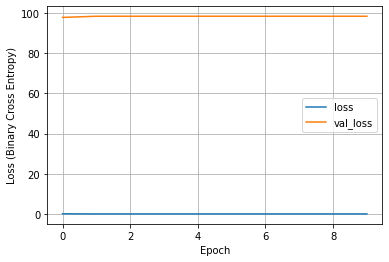

In [7]:
def plot_loss(hist):
    plt.figure()
    plt.plot(hist.history['loss'], label='loss')
    plt.plot(hist.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Binary Cross Entropy)')
    plt.legend()
    plt.grid(True)
    
plot_loss(toy_hist)

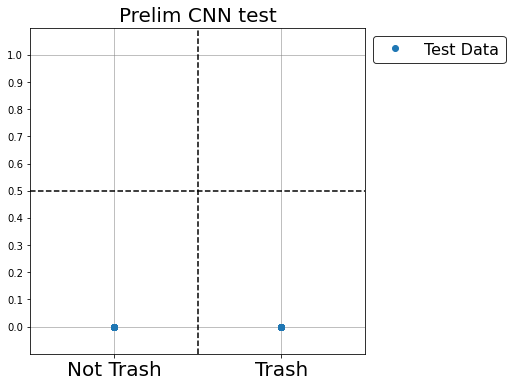

In [8]:
y_pred = np.round(toy_model.predict(X_test), 4)
plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred, 'o', label='Test Data')
plt.axvline(x=0.5, ls='--', c='k')
plt.axvline(x=0, ls='-', c='grey', zorder=0, lw=0.5)
plt.axvline(x=1, ls='-', c='grey', zorder=0, lw=0.5)
plt.axhline(y=0.5, ls='--', c='k')
plt.axhline(y=0, ls='-', c='grey', zorder=0, lw=0.5)
plt.axhline(y=1, ls='-', c='grey', zorder=0, lw=0.5)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['Not Trash', 'Trash'], size=20)
plt.ylim(-0.1,1.1)
plt.yticks(np.arange(0,1.01,0.1))
plt.legend(bbox_to_anchor=(1,1), loc='upper left', edgecolor='k', fontsize=16)
plt.title('Prelim CNN test', size=20)
None